## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\shris\Machine_learning\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Split the data into features (X) and target (y)

In [3]:
X = dataset[['YearsExperience']].values

In [4]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y = dataset["Salary"].values

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

print("X_train is ",X_train.shape)
print("X_test is ",X_test.shape)
print("y_train is ",y_train.shape)
print("y_test is ",y_test.shape)

X_train is  (24, 1)
X_test is  (6, 1)
y_train is  (24,)
y_test is  (6,)


## Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

fit method is used to train a model.

When you use regressor.fit(X_train, y_train),

the model learns from the training data (X_train) and the corresponding target values (y_train).

In a regression model, fit() adjusts the model's paarameters (m,c)...so that it can best predict the target values (y_train) based on the input data (X_train). 

After fitting, the model can make predictions on new, unseen data.

## Predicting the Test set results and on new data

In [9]:
y_pred = regressor.predict(X_test)
y_pred  # this is predicting value of x_test data

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [10]:
y_test # this is the actual output value of x_test data

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [11]:
new_pred = regressor.predict([[11]]) # prediction on new data..this data should be in 2d...because feature can be multiple
new_pred

array([129218.42554465])

In [12]:
m = regressor.coef_  # through this attribute u can find the value of m
m

array([9312.57512673])

In [13]:
c = regressor.intercept_
c

np.float64(26780.09915062818)

In [14]:
y = m*11+c # y = mx+c .....
y

array([129218.42554465])

## Evaluate the Model

Evaluation metrics are used to assess the performance of a machine learning model.

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared : {r2}')

R-squared : 0.988169515729126


#### Other Important Metrics:

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error : It tells you, on average, how far off your predictions are from the actual values.
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# MSE and RMSE alse measure errors, but they pay more attention to larger mistakes.
# This means if your model makes a few big errors, these metrics will show higher values.
# They are especially helpful if large errors are a serious problem for your predictions.

Mean Absolute Error (MAE): 2446.1723690465055
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343


In linear regression, we use metrics like MAE, MSE, RMSE, and R-squared to measure prediction accuracy and how well the model fits the data

## Visualizing the feature and label

Text(0, 0.5, 'Salary')

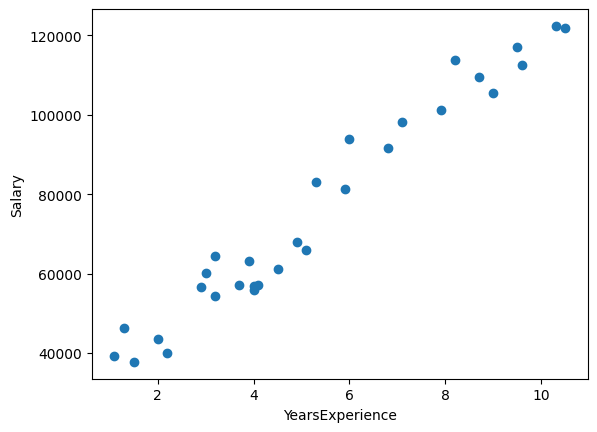

In [17]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

## Visualizing the Training set results

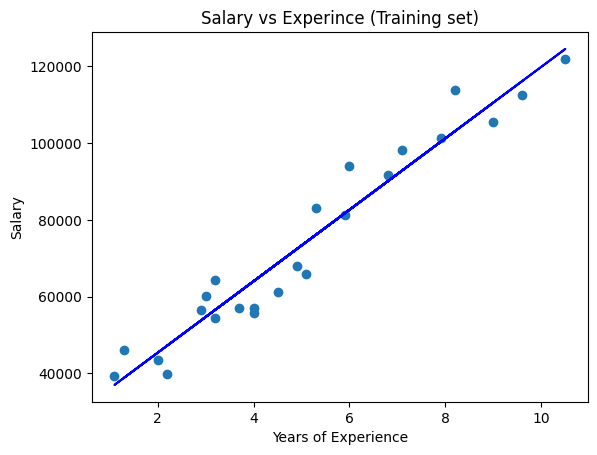

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Experince (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()